- compare-model-performance
    - x축
        - sp_smdm, bz_smsm
    - y축
        - MAPE 성능  

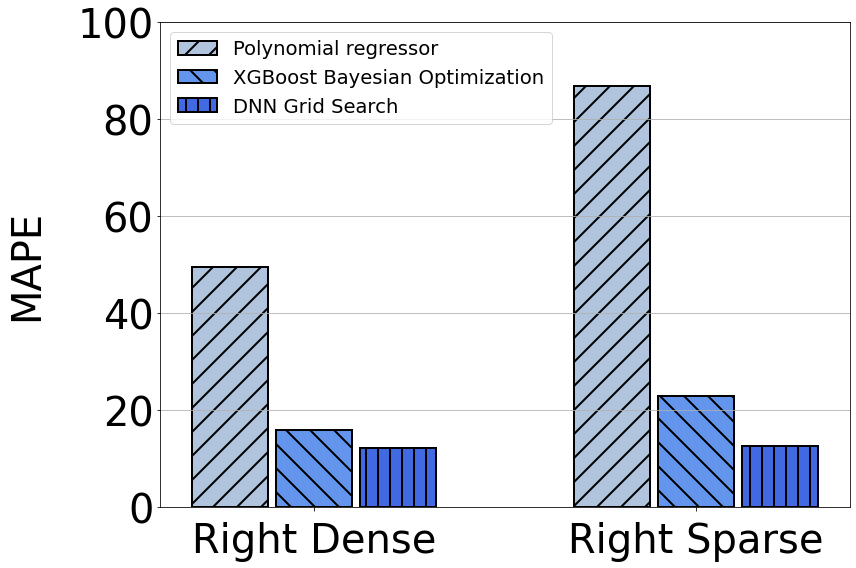

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# x 축 label
x_label = ["Right Dense", "Right Sparse"]

# dnn 모델의 default hyper-parameter 성능
dnn_default = [37.49, 73.20]
dnn_default_min = [37.49, 73.20]
dnn_default_max = [37.49, 73.20]
df = pd.DataFrame({'x_label':x_label,'dnn_default':dnn_default, 'dnn_default_min': dnn_default_min, 'dnn_default_max': dnn_default_max}) 

# 평균과 최소, 최대 간의 차이
df['mingap'] = df.dnn_default - df.dnn_default_min
df['maxgap'] = df.dnn_default_max - df.dnn_default
dnn_default_yerr = df[['mingap', 'maxgap']].T.to_numpy()

# dnn 모델의 grid search hyper-parameter 성능
dnn_grid = [12.12, 12.64]
dnn_grid_min = [12.12, 12.64]
dnn_grid_max = [12.12, 12.64]
df = pd.DataFrame({'x_label':x_label,'dnn_grid':dnn_grid, 'dnn_grid_min': dnn_grid_min, 'dnn_grid_max': dnn_grid_max}) 

# 평균과 최소, 최대 간의 차이
df['mingap'] = df.dnn_grid - df.dnn_grid_min
df['maxgap'] = df.dnn_grid_max - df.dnn_grid
dnn_grid_yerr = df[['mingap', 'maxgap']].T.to_numpy()

# xgbregressor 모델의 default hyper-parameter 성능
xgbregressor_default = [20.23, 27.67]
xgbregressor_default_min = [20.23, 27.67]
xgbregressor_default_max = [20.23, 27.67]
df = pd.DataFrame({'x_label':x_label,'xgbregressor_default':xgbregressor_default, 'xgbregressor_default_min': xgbregressor_default_min, 'xgbregressor_default_max': xgbregressor_default_max}) 

# 평균과 최소, 최대 간의 차이
df['mingap'] = df.xgbregressor_default - df.xgbregressor_default_min
df['maxgap'] = df.xgbregressor_default_max - df.xgbregressor_default
xgbregressor_default_yerr = df[['mingap', 'maxgap']].T.to_numpy()

# xgbregressor 모델의 BO hyper-parameter 성능
xgbregressor_bo = [15.99, 23.01]
xgbregressor_bo_min = [15.99, 23.01]
xgbregressor_bo_max = [15.99, 23.01]
df = pd.DataFrame({'x_label':x_label,'xgbregressor_bo':xgbregressor_bo, 'xgbregressor_bo_min': xgbregressor_bo_min, 'xgbregressor_bo_max': xgbregressor_bo_max}) 

# 평균과 최소, 최대 간의 차이
df['mingap'] = df.xgbregressor_bo - df.xgbregressor_bo_min
df['maxgap'] = df.xgbregressor_bo_max - df.xgbregressor_bo
xgbregressor_bo_yerr = df[['mingap', 'maxgap']].T.to_numpy()

# # NNLS 모델의 성능
# nnls_default = [252, 280]
# nnls_default_min = [252, 280]
# nnls_default_max = [252, 280]
# df = pd.DataFrame({'x_label':x_label,'nnls_default':nnls_default, 'nnls_default_min': nnls_default_min, 'nnls_default_max': nnls_default_max}) 

# # 평균과 최소, 최대 간의 차이
# df['mingap'] = df.nnls_default - df.nnls_default_min
# df['maxgap'] = df.nnls_default_max - df.nnls_default
# nnls_default_yerr = df[['mingap', 'maxgap']].T.to_numpy()

# polynomial 모델의 성능
poly_default = [49.53, 86.88]
poly_default_min = [49.53, 86.88]
poly_default_max = [49.53, 86.88]
df = pd.DataFrame({'x_label':x_label,'poly_default':poly_default, 'poly_default_min': poly_default_min, 'poly_default_max': poly_default_max}) 

# 평균과 최소, 최대 간의 차이
df['mingap'] = df.poly_default - df.poly_default_min
df['maxgap'] = df.poly_default_max - df.poly_default
poly_default_yerr = df[['mingap', 'maxgap']].T.to_numpy()

################################# x축 및 전체 figure 설정 ####################################################

fontsize = 40

plt.rc('axes', labelsize=fontsize)   # x,y축 label 폰트 크기
plt.rc('xtick', labelsize=fontsize)  # x축 눈금 폰트 크기 
plt.rc('ytick', labelsize=fontsize)  # y축 눈금 폰트 크기
plt.rc('legend', fontsize=fontsize*0.49)  # 범례 폰트 크기
plt.rcParams['hatch.linewidth'] = 2 # bar pattern 두께

x = np.arange(len(x_label)) # x축 인덱스
width = 0.2 # bar 넓이

fig, ax1 = plt.subplots(figsize=(12,8)) # figure 및 subplot 선언

# 각 bar 의 중심 지정
bar1 = ax1.bar(x - 0.22, poly_default, width, linewidth=2, edgecolor='black', yerr=poly_default_yerr, hatch='/', label='Polynomial regressor', color='lightsteelblue', capsize=20)
bar2 = ax1.bar(x , xgbregressor_bo, width, linewidth=2, edgecolor='black', yerr=xgbregressor_default_yerr, hatch='\\', label='XGBoost Bayesian Optimization', color='cornflowerblue', capsize=20)  
bar3 = ax1.bar(x + 0.22, dnn_grid, width, linewidth=2, edgecolor='black', yerr=dnn_default_yerr, hatch='|', label='DNN Grid Search', color='royalblue', capsize=20)

################################# ax1 ####################################################

ax1.set_xticks(x) # x축 인덱스
ax1.set_xticklabels(x_label) # x축 label 이름
ax1.tick_params(axis='x',pad=10) # x축 label pad

ax1.yaxis.grid(True) # y축만 grid 사용
ax1.set_ylim([0, 100])  # 좌측 y축 범위 설정
# ax1.set_yticks([0, 10, 20, 30, 40, 50, 60, 70, 80]) # y축 index 설정

# ax1.set_xlabel('Multiplication Method', labelpad=20) # ax1 ylabel 설정
ax1.set_ylabel('MAPE', labelpad=30) # ax1 ylabel 설정

#ax1.set_title('spmm sparse dense diff', pad=40) # ax1 title 설정
ax1.legend(loc="upper left") # 범례 표시
# 범례 글씨 크기 줄이기

# 이미지 저장시, figure 크기에 맞게 이미지 저장
fig.tight_layout()
fig.savefig('./compare-model-mape.png')
plt.show()